##  By Poonam Maroti Bhonge



# Multiple Linear Regression

## Bike sharing assignment

#### Problem Statement:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 
Company wants to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. 

#### Essentially, the company wants —

1.Which variables are significant in predicting the demand for shared bikes.

2.How well those variables describe the bike demands

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and required libraries to read the bike sharing dataset.

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [22]:
# import important libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [3]:
bikesharing = pd.read_csv("day.csv")

In [4]:
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspecting the various aspects of the bikesharing  dataframe

In [5]:
bikesharing.shape

(730, 16)

In [6]:
bikesharing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Dataset don't have any null value.

In [8]:
bikesharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Cleaning the Data


## 2.1 Drop columns that are not useful for analysis

instant is just a row instance identifier.

dteday is removed as we have some of date features like mnth and year and weekday already in other columns and also for this * analysis we will not consider day to day trend in demand for bikes.

casual and registered variables are not available at the time of prediction and also these describe the target variable cnt in a very trivial way target = casual + registered, which leads to data leakage.

In [10]:
#Before dropping date, let us introduce a days_old variable which indicates how old is the business
bikesharing['days_old'] = (pd.to_datetime(bikesharing['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days


In [11]:
#Inspect once
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_old
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [12]:
bikesharing.drop(['instant','dteday','casual','registered'], axis = 1, inplace = True)

bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [13]:
bikesharing.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_old'],
      dtype='object')

In [15]:
bikesharing.season.value_counts()


3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [16]:
bikesharing.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [17]:
bikesharing.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584,0.413587
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728,0.866026
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191,0.498251
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,0.016275
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,0.036183,-0.001182
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.027640,-0.015171
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929,-0.021862
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044,0.150738
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685,0.152773
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543,0.016080


we can see that features season, mnth, weekday and weathersit are integers although they should be non-numerical categories.

In [18]:
bikesharing.shape

(730, 13)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

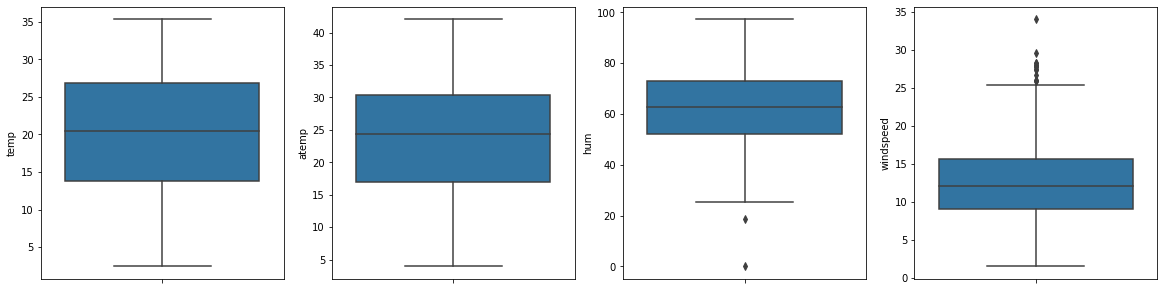

In [23]:
# Draw box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(20,5))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bikesharing)
    i+=1

From these plots, we can see there are no outliers to be handled.

In [25]:
bikesharing.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
days_old      0
dtype: int64

There are no null value to be handle.

## Step 3: Exploratory Data analysis

### 3.1 Convert season and weathersit to categorical types


In [26]:
bikesharing.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bikesharing.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bikesharing.mnth = bikesharing.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bikesharing.weekday = bikesharing.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bikesharing.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600,4
5,spring,0,jan,0,sat,0,good,8.378268,11.66045,51.8261,6.000868,1606,5
6,spring,0,jan,0,sun,0,moderate,8.057402,10.44195,49.8696,11.304642,1510,6
7,spring,0,jan,0,mon,1,moderate,6.765000,8.11270,53.5833,17.875868,959,7
8,spring,0,jan,0,tue,1,good,5.671653,5.80875,43.4167,24.250650,822,8
9,spring,0,jan,0,wed,1,good,6.184153,7.54440,48.2917,14.958889,1321,9


#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

#### To check the linear relationships.

<Figure size 1152x1872 with 0 Axes>

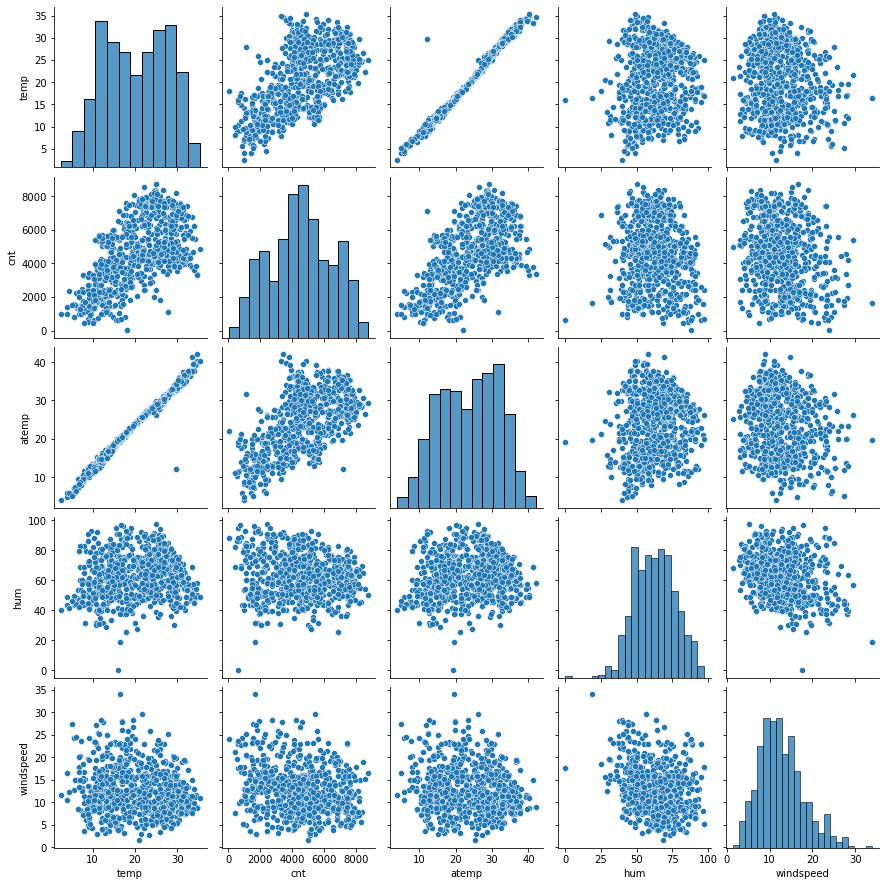

In [30]:
plt.figure(figsize = (16,26))
sns.pairplot(data=bikesharing,vars=['temp', 'cnt',  'atemp', 'hum','windspeed'])
plt.show()

### Conclusion :
* Looks like the temp and atemp has the highest corelation with the target variable cnt
* temp and atemp are highly co-related with each other

<Figure size 1584x1296 with 0 Axes>

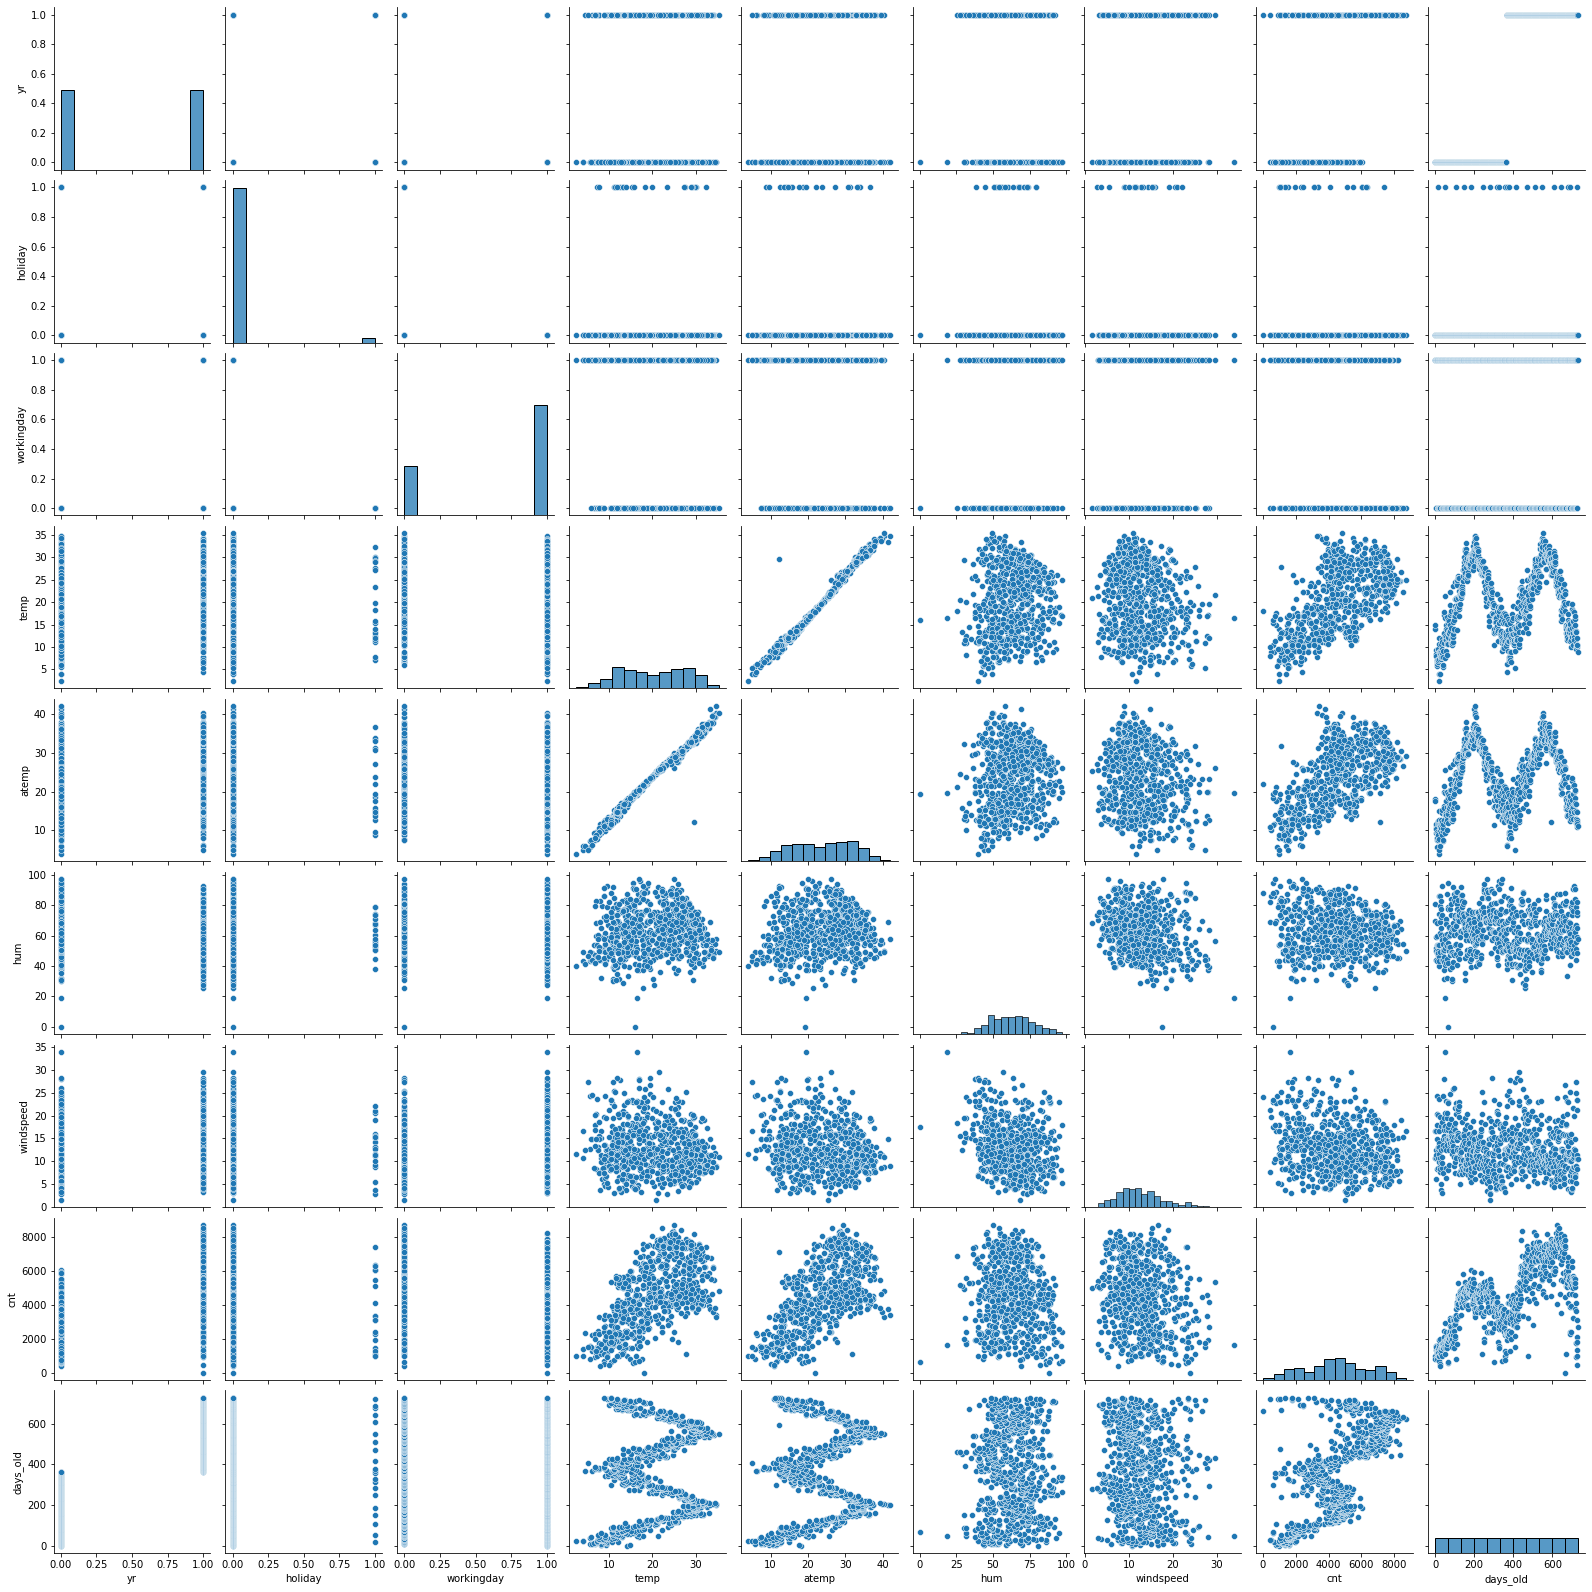

In [32]:
plt.figure(figsize=(22,18))
sns.pairplot(bikesharing)
plt.show()

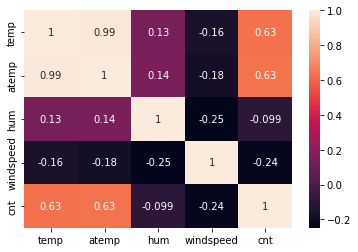

In [34]:
# Checking continuous variables relationship with each other
sns.heatmap(bikesharing[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True)
plt.show()

#### we see that temp and atemp has correlation more than .99 means almost 1 (highly correlated).

#### atemp seems to be derived from temp so atemp field can be dropped.

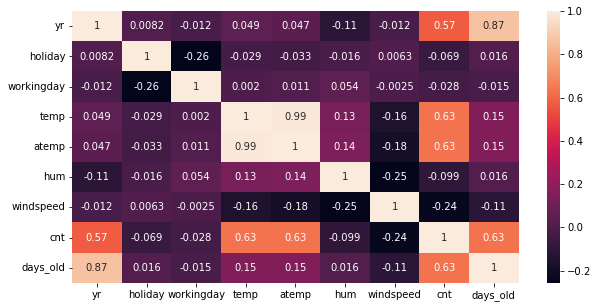

In [39]:
#Correlations for numeric variables
plt.figure(figsize=(10,5))
correlation=bikesharing.corr()
sns.heatmap(correlation, annot = True)
plt.show()

From the correlation map, temp, atemp and days_old seems to be highly correlated. However let us elminate it based on the Variance Inflation Factor later during the model building.

### 3.2 Analysing Categorical Variabels with target variables


Visualising Categorical Variables

There are a few categorical variables as well.Making a boxplot for some of these variables.

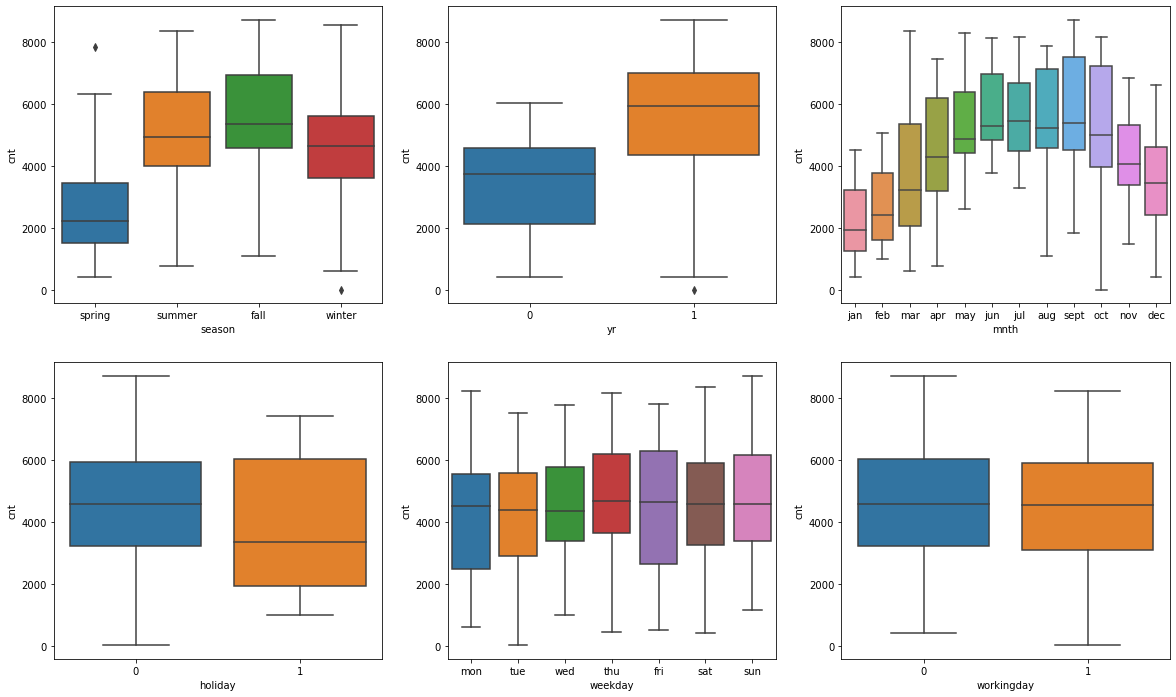

In [41]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikesharing)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikesharing)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikesharing)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikesharing)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikesharing)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikesharing)

plt.show()

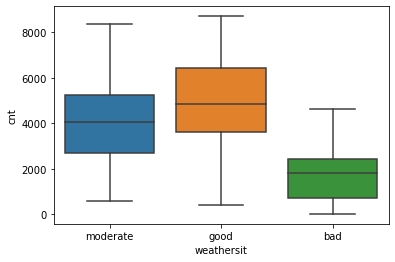

In [42]:

sns.boxplot(x = 'weathersit', y = 'cnt', data = bikesharing)
plt.show()

### Conclusion:

following are the  insights drawn from the plots

1. Season: 3:fall has highest demand for rental bikes where as spring has lowest demand.
2. Demand for next year has grown
3. Demand is continuously growing each month till July. September month has highest demand. After September, demand is        decreasing
4. At holiday, demand has decreased.
5. Weekday is not giving clear picture abount demand.


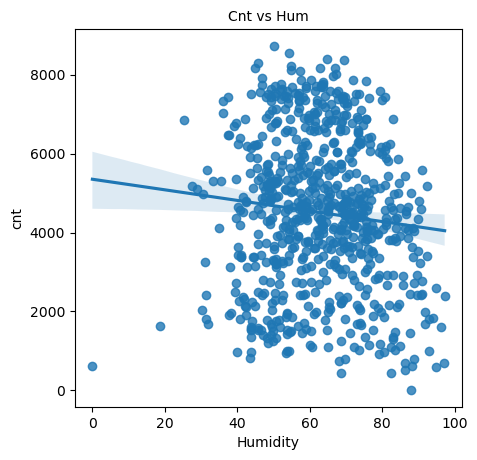

In [43]:
plt.figure(figsize=(5,5),dpi=100)
plt.title("Cnt vs Hum",fontsize=10)
sns.regplot(data=bikesharing,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

humidity values are more scattered around the line.

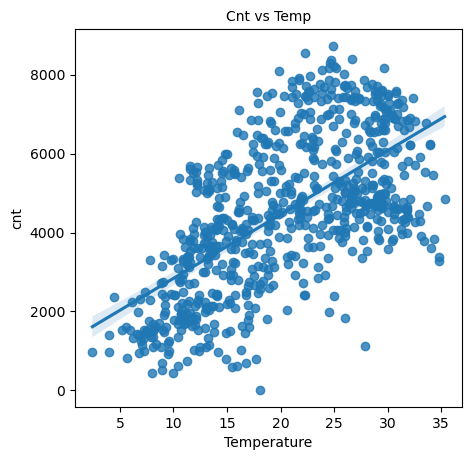

In [44]:
plt.figure(figsize=(5,5),dpi=100)
plt.title("Cnt vs Temp",fontsize=10)
sns.regplot(data=bikesharing,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

There is linear realtionship between count and the temperture. 

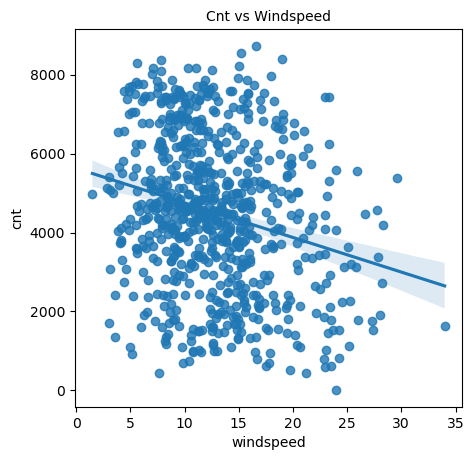

In [45]:
plt.figure(figsize=(5,5),dpi=100)
plt.title("Cnt vs Windspeed",fontsize=10)
sns.regplot(data=bikesharing,y="cnt",x="windspeed")
plt.show()

windspeed values are more scattered around the line.

In [46]:
bikesharing.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849,364.500000
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647,210.877136
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,182.250000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,364.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,546.750000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,729.000000


# 4 Data Preparation for Linear Regression


In [48]:
bikesharing.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600,4
5,spring,0,jan,0,sat,0,good,8.378268,11.66045,51.8261,6.000868,1606,5
6,spring,0,jan,0,sun,0,moderate,8.057402,10.44195,49.8696,11.304642,1510,6
7,spring,0,jan,0,mon,1,moderate,6.765000,8.11270,53.5833,17.875868,959,7
8,spring,0,jan,0,tue,1,good,5.671653,5.80875,43.4167,24.250650,822,8
9,spring,0,jan,0,wed,1,good,6.184153,7.54440,48.2917,14.958889,1321,9


### 4.1Create dummy variables for all categorical variables

In [50]:
bikesharing = pd.get_dummies(data=bikesharing,columns=["season","mnth","weekday"],drop_first=True)

In [51]:
bikesharing = pd.get_dummies(data=bikesharing,columns=["weathersit"])

In [52]:
#Print columns after creating dummies
bikesharing.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days_old', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [53]:
bikesharing.head(10)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,0,0,1,0
5,0,0,0,8.378268,11.66045,51.8261,6.000868,1606,5,1,...,0,0,1,0,0,0,0,0,1,0
6,0,0,0,8.057402,10.44195,49.8696,11.304642,1510,6,1,...,0,0,0,1,0,0,0,0,0,1
7,0,0,1,6.765000,8.11270,53.5833,17.875868,959,7,1,...,0,1,0,0,0,0,0,0,0,1
8,0,0,1,5.671653,5.80875,43.4167,24.250650,822,8,1,...,0,0,0,0,0,1,0,0,1,0
9,0,0,1,6.184153,7.54440,48.2917,14.958889,1321,9,1,...,0,0,0,0,0,0,1,0,1,0


# 5 Model Building

## 5.1 Split Data into training and test

In [54]:
bikesharing.shape

(730, 32)

In [55]:
#y to contain only target variable
y=bikesharing.pop('cnt')

#X is all remainign variable also our independent variables
X=bikesharing

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,1,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,1,0,...,0,0,0,0,0,0,0,0,1,0


In [57]:
print(X_train.shape)

(511, 31)


In [58]:
print(X_test.shape)

(219, 31)


# 5.2 Scaling continuous variables


In [59]:
# Importing required library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [60]:
numerical_vars = ['temp','atemp','hum','windspeed','days_old']
scaler = MinMaxScaler()
X_train[numerical_vars] = scaler.fit_transform(X_train[numerical_vars])

In [61]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.698630,0.550874,0.526518,0.654174,0.414873,0.512409,0.230920,0.258317,...,0.09002,0.148728,0.142857,0.133072,0.135029,0.156556,0.133072,0.029354,0.624266,0.346380
std,0.500067,0.163398,0.459303,0.227231,0.212976,0.143648,0.185619,0.292268,0.421834,0.438138,...,0.28649,0.356169,0.350270,0.339986,0.342090,0.363738,0.339986,0.168963,0.484786,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.254458,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.521262,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.770233,0.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
X_train.head(10)

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0.936900,0,0,...,0,0,0,0,0,0,0,0,0,1
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.884774,0,0,...,0,0,0,0,0,1,0,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.223594,0,1,...,0,0,0,0,0,0,1,0,1,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.493827,1,0,...,0,0,0,0,1,0,0,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0.877915,0,0,...,0,0,0,0,1,0,0,0,0,1
625,1,0,1,0.703024,0.637937,0.899098,0.839562,0.857339,0,0,...,1,0,0,0,0,0,1,0,0,1
711,1,0,1,0.294943,0.282372,0.500644,0.380056,0.975309,0,0,...,0,0,0,0,0,0,0,0,1,0
311,0,0,1,0.435124,0.437339,0.743667,0.116833,0.426612,0,0,...,0,0,0,0,1,0,0,0,1,0
333,0,0,1,0.331287,0.304730,0.632030,0.623084,0.456790,0,0,...,0,0,0,0,0,0,0,0,1,0
456,1,0,1,0.466998,0.457379,0.519723,0.725728,0.625514,0,1,...,0,0,0,0,0,1,0,0,1,0


## 5.3 Building  a linear  Model 


In [64]:
lr = LinearRegression()
lr.fit(X_train,y_train)
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)


RFE(estimator=LinearRegression(), n_features_to_select=15)

In [65]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 15),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days_old', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 13),
 ('season_winter', True, 1),
 ('mnth_aug', False, 4),
 ('mnth_dec', False, 2),
 ('mnth_feb', False, 11),
 ('mnth_jan', False, 7),
 ('mnth_jul', False, 12),
 ('mnth_jun', False, 5),
 ('mnth_mar', True, 1),
 ('mnth_may', True, 1),
 ('mnth_nov', False, 3),
 ('mnth_oct', True, 1),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', False, 16),
 ('weekday_sun', False, 14),
 ('weekday_thu', False, 17),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 9),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', False, 6)]

Fitting a regression line through the training data using `statsmodels`. In `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [66]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [68]:
# Check the parameters obtained

lr.params

const    1574.249597
temp     5407.226757
dtype: float64

As we have to fit the constant with each independent variable hence creating a function.

In [69]:
#Function to build a model using statsmodel api
def build_new_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm


## Model : 1

In [71]:
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'season_winter', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [73]:
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']]



In [74]:
X_train_rfe.shape

(511, 15)

In [75]:
# selecting all columns
columns = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

build_new_model(columns)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     165.0
Date:                Sun, 26 Dec 2021   Prob (F-statistic):          1.70e-181
Time:                        15:35:32   Log-Likelihood:                -4134.9
No. Observations:                 511   AIC:                             8302.
Df Residuals:                     495   BIC:                             8370.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2809.2461    

####  From above table it is clear that mnth_jan has high p_value.

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [78]:
#Function to calculate VIFs and print them 
def vif_value(cols):
    df = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [79]:
vif_value(columns)

               Features    VIF
4                   hum  28.53
3                  temp  17.32
2            workingday   6.06
5             windspeed   5.73
6         season_spring   4.45
8         season_winter   3.24
7         season_summer   3.01
14  weathersit_moderate   2.26
0                    yr   2.10
12          weekday_sat   2.01
10             mnth_jul   1.83
9              mnth_jan   1.67
11            mnth_sept   1.47
13       weathersit_bad   1.27
1               holiday   1.21


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

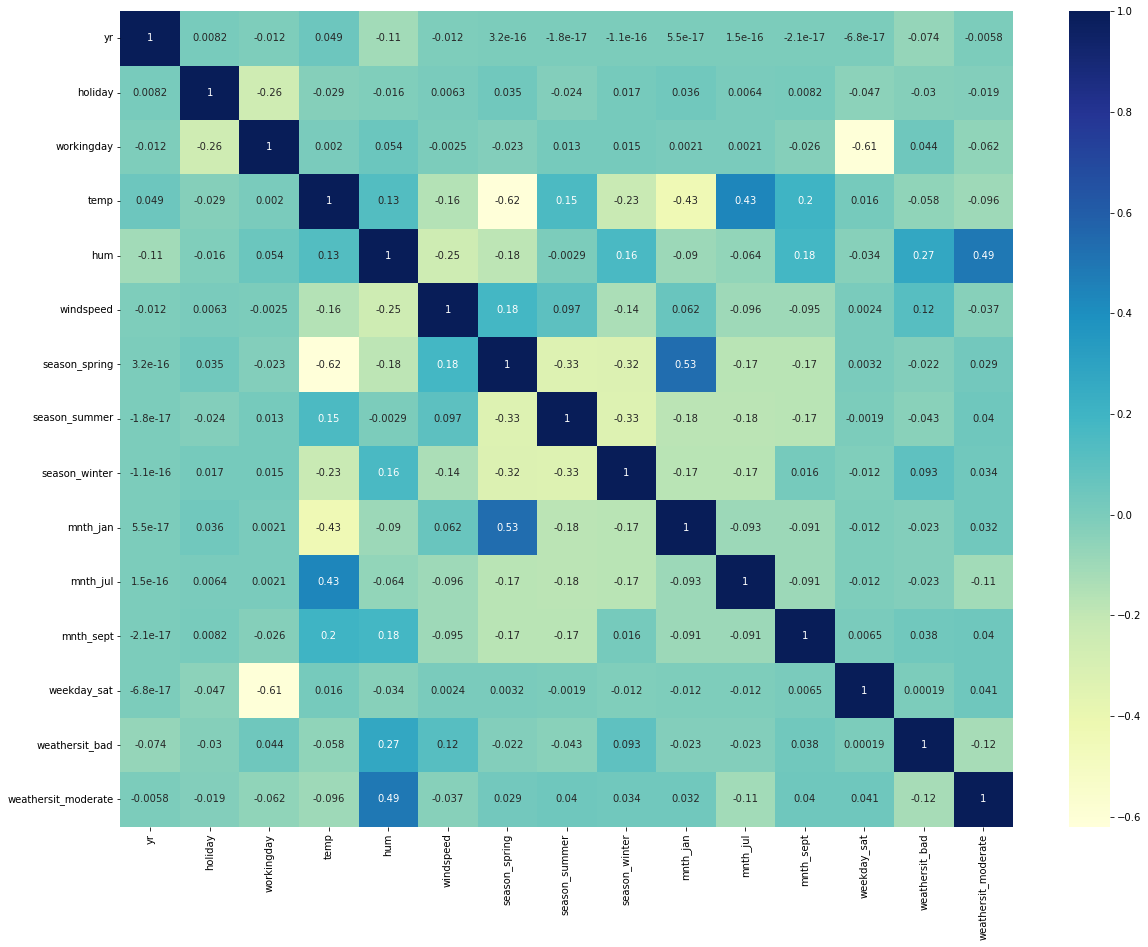

In [80]:
# checking impact of different features on target
plt.figure(figsize = (20,15))
sns.heatmap(bikesharing[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']].corr(), cmap="YlGnBu", annot=True)
plt.show()

## Model : 2

In [81]:
# Dropping the variable mnth_jan as it has negative coefficient and is insignificant as it has high p-value i.e 0.702.
columns = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_new_model(columns)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.1
Date:                Sun, 26 Dec 2021   Prob (F-statistic):          1.35e-182
Time:                        15:49:58   Log-Likelihood:                -4135.0
No. Observations:                 511   AIC:                             8300.
Df Residuals:                     496   BIC:                             8363.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2792.2799    

### R-squared value is still same after dropping mnth_jan.

In [82]:
# checking for VIF after dropping mnth_jan column
vif_value(columns)

               Features    VIF
4                   hum  27.99
3                  temp  16.83
2            workingday   6.06
5             windspeed   5.70
6         season_spring   4.10
8         season_winter   3.23
7         season_summer   3.01
13  weathersit_moderate   2.25
0                    yr   2.10
11          weekday_sat   2.01
9              mnth_jul   1.82
10            mnth_sept   1.47
12       weathersit_bad   1.26
1               holiday   1.21


#### VIF for 'hum' and temp dropped to 27.99 and 16.83 after dropping mnth_jan, but still high. We will manage it in further modeling.


## Model : 3

In [91]:
# Dropping the variable weekday_sat as it has negative coefficient and is insignificant as it has high p-value i.e 0.602.

columns = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept','weathersit_bad', 'weathersit_moderate']
build_new_model(columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.9
Date:                Sun, 26 Dec 2021   Prob (F-statistic):          1.10e-183
Time:                        16:14:20   Log-Likelihood:                -4135.1
No. Observations:                 511   AIC:                             8298.
Df Residuals:                     497   BIC:                             8358.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2754.1903    

In [92]:
# checking for VIF after dropping weekday_sat column
vif_value(columns)

               Features    VIF
4                   hum  27.69
3                  temp  16.13
5             windspeed   5.67
6         season_spring   3.91
2            workingday   3.56
8         season_winter   3.14
7         season_summer   2.96
12  weathersit_moderate   2.25
0                    yr   2.10
9              mnth_jul   1.82
10            mnth_sept   1.47
11       weathersit_bad   1.26
1               holiday   1.11


### Observation : from above results p_values for all the variable are < 0.05.
### Now checking for the VIFs

## Model : 4

In [93]:
# Dropping the variable hum as it has very high VIF i.e 27.69.
columns = ['yr', 'holiday', 'workingday', 'temp','windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept','weathersit_bad', 'weathersit_moderate']
build_new_model(columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     199.3
Date:                Sun, 26 Dec 2021   Prob (F-statistic):          2.49e-181
Time:                        16:19:34   Log-Likelihood:                -4143.5
No. Observations:                 511   AIC:                             8313.
Df Residuals:                     498   BIC:                             8368.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1979.6907    

In [94]:
# checking for VIF after dropping hum column
vif_value(columns)

               Features   VIF
3                  temp  6.80
4             windspeed  5.66
2            workingday  3.39
6         season_summer  2.62
5         season_spring  2.38
0                    yr  2.09
7         season_winter  2.03
8              mnth_jul  1.82
11  weathersit_moderate  1.57
9             mnth_sept  1.42
1               holiday  1.10
10       weathersit_bad  1.09


### Observation: After dropping hum, VIF for temp falls to 6.80. But still >5, need to manage in further modeling.

## Model : 5

In [95]:
# Dropping the variable temp as it has high VIF i.e 6.80.
columns = ['yr', 'holiday', 'workingday','windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept','weathersit_bad', 'weathersit_moderate']
build_new_model(columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     146.1
Date:                Sun, 26 Dec 2021   Prob (F-statistic):          3.19e-148
Time:                        16:22:42   Log-Likelihood:                -4224.7
No. Observations:                 511   AIC:                             8473.
Df Residuals:                     499   BIC:                             8524.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5219.2280    

In [96]:
# checking for VIF after dropping temp column
vif_value(columns)

               Features   VIF
3             windspeed  4.73
2            workingday  3.03
5         season_summer  2.42
4         season_spring  2.30
6         season_winter  2.01
0                    yr  1.98
10  weathersit_moderate  1.54
7              mnth_jul  1.39
8             mnth_sept  1.25
1               holiday  1.09
9        weathersit_bad  1.08


### Observation : In above model, VIF for all variables are < 5, but p_value for variable mnth_jul increase to 0.814.

## Model : 6

In [97]:
# Dropping the variable mnth_jul as it has high p_value, i.e 0.814
columns = ['yr', 'holiday', 'workingday','windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept','weathersit_bad', 'weathersit_moderate']
build_new_model(columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     161.1
Date:                Sun, 26 Dec 2021   Prob (F-statistic):          2.52e-149
Time:                        16:25:46   Log-Likelihood:                -4224.7
No. Observations:                 511   AIC:                             8471.
Df Residuals:                     500   BIC:                             8518.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5238.8244    

In [98]:
# checking for VIF after dropping mnth_july column
vif_value(columns)

              Features   VIF
3            windspeed  4.35
2           workingday  2.85
5        season_summer  2.05
4        season_spring  1.96
0                   yr  1.91
6        season_winter  1.75
9  weathersit_moderate  1.54
7            mnth_sept  1.19
1              holiday  1.08
8       weathersit_bad  1.08


## Model : 7

In [100]:
# adding temp and removed 'season_summer' and 'workingday'
columns= ['yr', 'holiday', 'windspeed', 'season_spring',
       'temp','season_winter','mnth_sept','weathersit_bad','weathersit_moderate']
build_new_model(columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     250.6
Date:                Sun, 26 Dec 2021   Prob (F-statistic):          3.37e-179
Time:                        16:38:50   Log-Likelihood:                -4157.0
No. Observations:                 511   AIC:                             8334.
Df Residuals:                     501   BIC:                             8376.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2375.8419    

In [101]:
# checking for VIF after adding temp and removing 'season_summer' and 'workingday.
vif_value(columns)

              Features   VIF
2            windspeed  4.81
4                 temp  4.27
0                   yr  2.08
3        season_spring  1.68
8  weathersit_moderate  1.53
5        season_winter  1.36
6            mnth_sept  1.16
7       weathersit_bad  1.08
1              holiday  1.04


### Conclusion:
Here VIF seems to be almost accepted that is < 5. p-value for all the features is almost 0.0 and R_squared is 0.818 Let us select Model 7 as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables. Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model.

# 6 Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [102]:
print(columns)

['yr', 'holiday', 'windspeed', 'season_spring', 'temp', 'season_winter', 'mnth_sept', 'weathersit_bad', 'weathersit_moderate']


In [106]:
#Let us build the finalmodel using sklearn

def build_sk_model(X,y):
    lr = LinearRegression()
    lr.fit(X,y)
    return lr


columns= ['yr', 'holiday', 'windspeed', 'season_spring',
       'temp','season_winter','mnth_sept','weathersit_bad','weathersit_moderate']

#Build a model with above columns
lr1 = build_sk_model(X_train[columns],y_train)
print(lr1.intercept_,lr1.coef_)

2375.841915955613 [ 2000.33477549  -708.56051858  -747.87192072 -1246.69541931
  3423.27589041   429.54541434   546.30438793 -2212.1466533
  -647.33276933]


In [107]:
y_train_pred = lr1.predict(X_train[columns])

Text(0.5, 0, 'Errors')

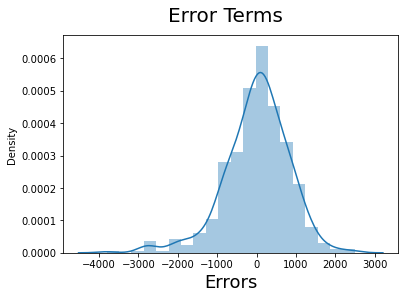

In [108]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [109]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.818269174082092

R_squared is same as we obtained in our final model

## 7 Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. Seventh model.

In [110]:
print(X_test.shape)

(219, 31)


### 7.1 Applying the scaling on the test sets

In [111]:
numerical_vars = ['temp','atemp','hum','windspeed','days_old']

X_test[numerical_vars] = scaler.transform(X_test[numerical_vars])

In [112]:
X_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.452055,0.031963,0.671233,0.527468,0.501760,0.629546,0.435511,0.471046,0.283105,0.237443,...,0.063927,0.132420,0.141553,0.164384,0.159817,0.114155,0.164384,0.027397,0.657534,0.315068
std,0.498836,0.176306,0.470841,0.229936,0.215759,0.152584,0.212750,0.280674,0.451539,0.426491,...,0.245183,0.339723,0.349389,0.371472,0.367276,0.318728,0.371472,0.163612,0.475622,0.465607
min,0.000000,0.000000,0.000000,0.047675,0.051010,0.193646,0.060760,0.002743,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.324018,0.314694,0.520479,0.281156,0.240055,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.507811,0.496145,0.608416,0.416900,0.469136,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.726388,0.685028,0.735901,0.534288,0.701646,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.970925,0.939531,1.002146,1.214955,0.995885,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [115]:
#Columns from our final model
columns= ['yr', 'holiday', 'windspeed', 'season_spring',
       'temp','season_winter','mnth_sept','weathersit_bad','weathersit_moderate']


#Predict the values for test data
y_test_pred = lr1.predict(X_test[columns])

### 7.2 R-Squared value for test predictions

In [116]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.8204181836689438

### Conclusion:
###### R_squared value for predictions on test data (0.82) is almost same as R_squared value of train data(0.818, appro 0.82). This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data)

## 8. Model Evaluation

Now plotting the graph for actual versus predicted values.

Text(0, 0.5, 'y_test_pred')

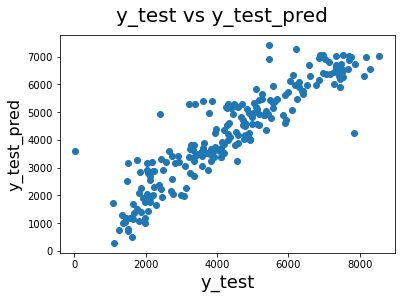

In [117]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)      

### Conclusion:
We can observe that variance of the residuals (error terms) is constant across predictions. i.e error term does not vary much as the value of the predictor variable changes.

### 8.1 Actual Test vs Predicted Test values

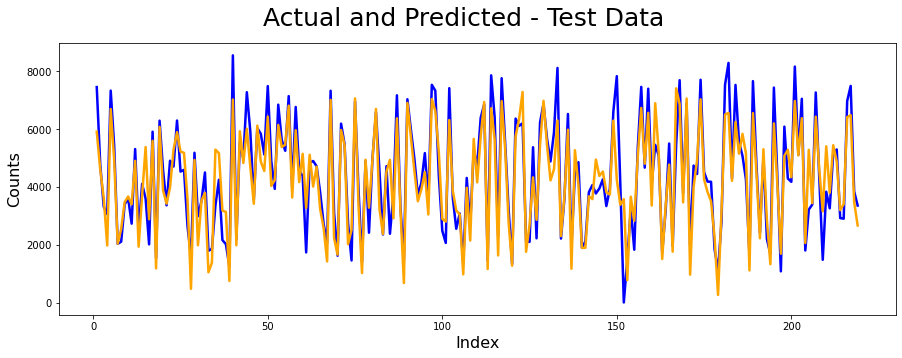

In [120]:
def actual_vr_predicted(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    
    fig = plt.figure(figsize=(15,5))
    
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="orange",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=25)              
     
    plt.xlabel('Index', fontsize=16)                              
    
    plt.ylabel('Counts', fontsize=16)    
    
    
actual_vr_predicted(y_test,y_test_pred,len(y_test)+1,'Test Data')

### Conclusion:
Predictions for test data is very close to actual Values.

### 8.2 Error Terms for test data

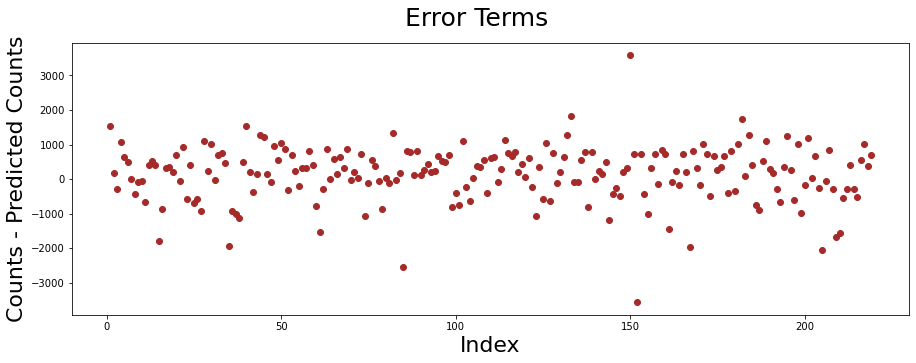

In [121]:
def error_terms(actual,predicted):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(15,5))
    
    plt.plot(c,actual-predicted, color="Brown", marker='o', linewidth=2.5, linestyle="")
    
    fig.suptitle('Error Terms', fontsize=25)            
   
    plt.xlabel('Index', fontsize=22)         
    
    plt.ylabel('Counts - Predicted Counts', fontsize=22)  
    
error_terms(y_test,y_test_pred)  

### Conclusion
From above plot we can see that the there is no any pattern in error terms i.e error terms are randomly distributed, which means the output is explained well by the model.

In [122]:
columns= ['yr', 'holiday', 'windspeed', 'season_spring',
       'temp','season_winter','mnth_sept','weathersit_bad','weathersit_moderate']
build_new_model(columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     250.6
Date:                Sun, 26 Dec 2021   Prob (F-statistic):          3.37e-179
Time:                        19:17:02   Log-Likelihood:                -4157.0
No. Observations:                 511   AIC:                             8334.
Df Residuals:                     501   BIC:                             8376.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2375.8419    

# Interepretation of results


### Analysing the above model, the comapany should focus on the following features:
1] In the bike sharing dataset , The demand of bike is low in the month of spring as compared to other seasons

2] Company should focus on expanding business during September.

3] Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2018 i.e The demand bike boost in the year 2019 compared with year 2018.

4] Season- Fall is the high season, where the number of bikes rented is high

5] Weather- The number of bikes rented is high when the weather is clear, few clouds

6] Weekdays-The number of bikes rented goes high during mid week, i.e during holidays bike demand is less. 

7] Month-The number of bikes rented goes high during summer days when temperature goes high.


## Conclusion

Significant variables to predict the demand for shared bikes

year, holiday, windspeed, season_spring, temp, season_winter, mnth_sept, weathersit_bad, weathersit_moderate.